In [3]:
import numpy as np

data = np.loadtxt('linear.csv', delimiter=',')
print('数据集大小：', len(data))
X = data[:, :2]
y = data[:, 2]

数据集大小： 200


In [5]:
from sklearn.model_selection import train_test_split
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[ 1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1.
  1.  1. -1.  1.  1.  1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1.
 -1. -1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1.  1.  1. -1.
  1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.  1. -1.
  1.  1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.  1.  1.
 -1. -1.  1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1. -1.
 -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.
  1.  1.  1. -1. -1.  1. -1.  1. -1.  1.  1.  1. -1. -1. -1.  1.]


In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 创建SVM分类器
svm = SVC(kernel='linear', C=1.0, random_state=42)

# 训练SVM模型
svm.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = svm.predict(X_test)
print('y_pred:',y_pred)

# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

y_pred: [-1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1. -1. -1.
 -1.  1.  1. -1.  1.  1. -1. -1.  1. -1.  1. -1. -1.  1. -1. -1.  1.  1.
 -1.  1.  1.  1.]
Accuracy: 1.0


In [7]:
# 获取权重向量和偏置项
weights = svm.coef_[0]  # 对于多类分类，这里会有多个权重向量，但线性SVM在二分类时只有一个
bias = svm.intercept_[0]  # 对于多类分类，这里会有多个截距，但线性SVM在二分类时只有一个

print("Weights:", weights)
print("Bias:", bias)

Weights: [-0.98271406  1.57820907]
Bias: -1.1876992809706428


In [8]:
# 假设有一个新的数据点 x_new
x_new = np.array([[-0.5, -0.4]])

# 计算预测值
prediction = np.dot(x_new, weights) + bias

# 由于SVM的输出是决策函数值，你可能需要将其转换为类别标签（对于二分类问题）：
if prediction >= 0:
    class_label = 1
else:
    class_label = -1  # 或者根据你的具体情况，可能是0或其他标签

print("Predicted class label:", class_label)

Predicted class label: -1


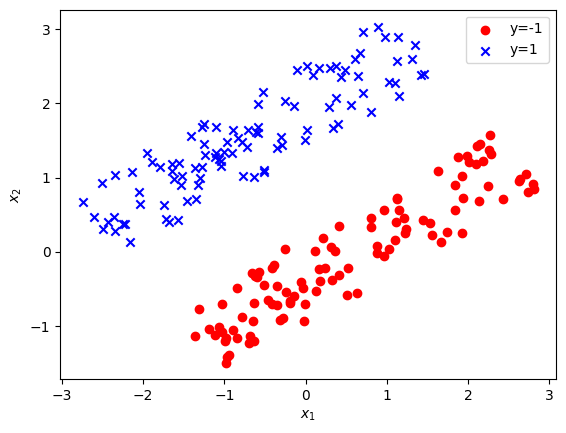

In [9]:
import matplotlib.pyplot as plt
# 数据集可视化
plt.figure()
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='red', label='y=-1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', marker='x', label='y=1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.legend()
plt.show()